## ENSEMBLE METHODS (PART 1)

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from numpy import mean,std

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.model_selection import cross_val_score,KFold,train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
#LOADING DATASET
house_df=pd.read_csv('kc_house_data.csv')
house_df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


##### TASK 1 (DATA PREPARATION AND SPLITTING)

In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

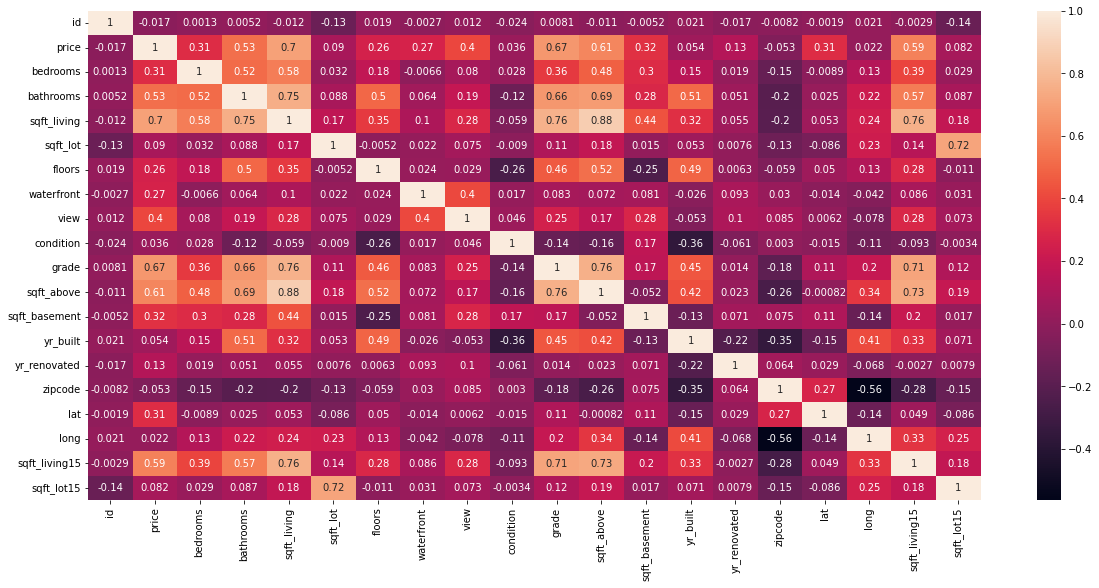

In [4]:
#DETECTING CORRELATION
f, ax = plt.subplots(figsize=(20, 9))
corr = house_df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [5]:
#removed columns 
house_df=house_df.drop(['date','id'],axis=1)

In [6]:
#transforming columns with very high values
house_df['price']=np.log(house_df['price'])
house_df['sqft_living']=np.log(house_df['sqft_living'])

In [7]:
#ENCODING &creating dummies for ZIPCODE

surviver_encoder = preprocessing.LabelEncoder()

# Encoding
surviver_encoder.fit(house_df.zipcode)
print(surviver_encoder.classes_)
house_df.zipcode = surviver_encoder.transform(house_df.zipcode)

#converting as category
house_df['zipcode'] = house_df.zipcode.astype('category')
#creating dummies
zip_dummies = pd.get_dummies(house_df.zipcode, prefix="zipcode")
df_with_dummies = pd.concat([house_df,zip_dummies],axis='columns')
df_with_dummies.drop('zipcode',axis='columns',inplace=True)
house_df=df_with_dummies.copy()
house_df.head()

[98001 98002 98003 98004 98005 98006 98007 98008 98010 98011 98014 98019
 98022 98023 98024 98027 98028 98029 98030 98031 98032 98033 98034 98038
 98039 98040 98042 98045 98052 98053 98055 98056 98058 98059 98065 98070
 98072 98074 98075 98077 98092 98102 98103 98105 98106 98107 98108 98109
 98112 98115 98116 98117 98118 98119 98122 98125 98126 98133 98136 98144
 98146 98148 98155 98166 98168 98177 98178 98188 98198 98199]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_60,zipcode_61,zipcode_62,zipcode_63,zipcode_64,zipcode_65,zipcode_66,zipcode_67,zipcode_68,zipcode_69
0,12.309982,3,1.00,7.073270,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,13.195614,3,2.25,7.851661,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,12.100712,2,1.00,6.646391,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,13.311329,4,3.00,7.580700,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,13.142166,3,2.00,7.426549,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#SEPARATING TARGET AND FEATURES
X=house_df.iloc[:,1:]
y=house_df.iloc[:,0:1]
X.shape,y.shape

((21613, 87), (21613, 1))

In [9]:
#Training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((17290, 87), (4323, 87), (17290, 1), (4323, 1))

In [10]:
#SCALING
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
results=list();names=list()

##### TASK 2 (BASELINE:LINEAR REGRESSION)

In [12]:
# define the model
model=LinearRegression()

# evaluate the model
cv=KFold(n_splits=10)
n_scores=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=cv,n_jobs=-1)

results.append(n_scores)
names.append('lr')

#report performance
print('MSE for linear regression:%.3f (%.3f)'%(mean(n_scores),std(n_scores)))

MSE for linear regression:-0.033 (0.001)


##### TASK 3 (BAGGING WITH RANDOM FOREST)

In [13]:
# define the model
model = RandomForestRegressor()

# evaluate the model
cv = KFold(n_splits=10)
n_scores = cross_val_score(model, X_train, y_train,scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

results.append(n_scores)
names.append('rf')

#report performance
print('MSE for Bagging with Random Forest:%.3f (%.3f)'%(mean(n_scores),std(n_scores)))

MSE for Bagging with Random Forest:-0.032 (0.002)


##### TASK 4

Random forest regressor is the best model

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
# define the model
model = RandomForestRegressor()

#fit model on train data
model.fit(X_train,y_train)

#make predictions
Y_pred=model.predict(X_test)

In [16]:
print('The Predicted values are:-\n',Y_pred)

The Predicted values are:-
 [13.40757195 13.61420601 13.01020389 ... 12.82222075 12.84207595
 12.45630015]


In [17]:
actual_ytest=np.exp(y_test)
actual_ypred=np.exp(Y_pred)

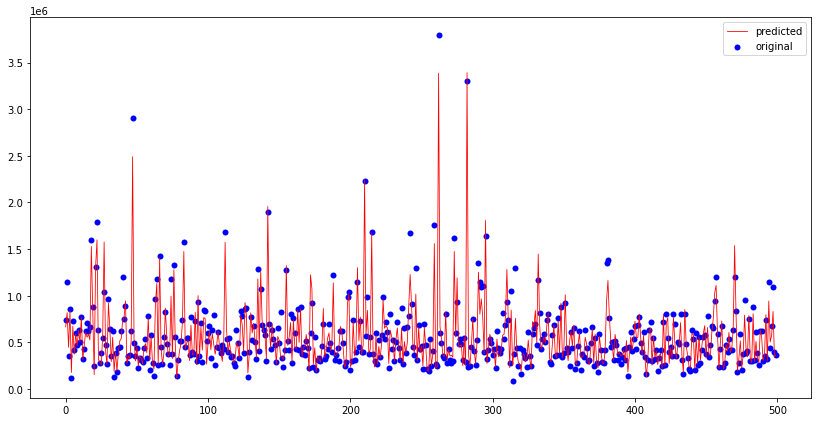

In [18]:
#PLOTTING 
x_ax=range(len(actual_ytest[0:500]))
plt.figure(figsize=(14,7))
plt.scatter(x_ax,actual_ytest[0:500],color='blue',lw=0.0,label='original')
plt.plot(x_ax,actual_ypred[0:500],color='red',lw=0.8,label='predicted')
plt.legend()
plt.show()

In [19]:
#END